In [36]:
import csv
import random
from sklearn.metrics import r2_score
import numpy as np
from sklearn.linear_model import Lasso,Ridge
import matplotlib.pyplot as plt
from tabulate import tabulate


In [37]:
all_molecules = []
with open('data/bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)


# each point in x_train has 4 values - 1 for each feature
x_train = np.array([x[0] for x in all_molecules[:num_train]])

# each point in y_train has 1 value - the bandgap of the molecule
y_train = np.array([x[1] for x in all_molecules[:num_train]])

x_test = np.array([x[0] for x in all_molecules[num_train:]])
y_test = np.array([x[1] for x in all_molecules[num_train:]])


In [38]:
class LinearRegressionscratch:

    def __init__(self, learning_rate=0.01, n_iterations=10000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.loss = []
    
    @staticmethod
    def _mean_squared_error(y, y_hat):
        error = 0
        for i in range(len (y)):
            error += (y[i] - y_hat[i])**2
            return error / len(y)

    def fit (self, x, y):

        # 1. Initialize weights and bias to zeros
        self.weights = np.zeros(x.shape[1])
        self.bias=0
        
        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            # Line equation
            y_hat = np.dot (x, self.weights) + self.bias
            loss = self._mean_squared_error(y, y_hat)
            self.loss.append(loss)
            
            # Calculate derivatives
            partial_w = (1 / x.shape[0]) * (2 * np.dot(x.T, (y_hat - y)))
            partial_d = (1 / x.shape[0]) * (2 * np.sum(y_hat - y))
            
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
    
    def predict (self, X):
    
        return np.dot(X, self.weights) + self.bias

In [39]:
model=LinearRegressionscratch()
model.fit(x_train,y_train)
pred=model.predict(x_test)


In [30]:
# xs = np.arange (len (model.loss))
# ys = model.loss
# # print(min(ys))
# plt.plot(xs, ys, lw=3)
# plt.title('Loss per iteration (MSE)', size=20)
# plt.xlabel('Iteration', size=14)
# plt.ylabel('Loss', size=14)
# plt.show()

9.316962139432912e-14
[5.397938007471901e-10, 1.0353761131601114e-09, 3.7801095001071005e-11, 9.316962139432912e-14, 0.0010028662396738297]


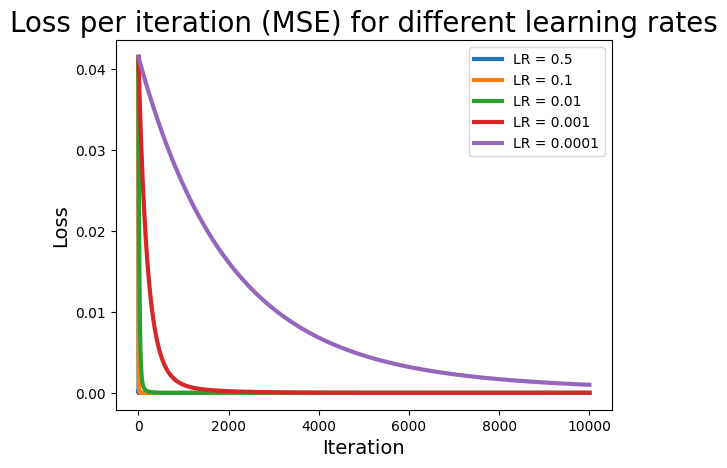

In [31]:
losses = {} 
mloss=[]
for Ir in [0.5, 0.1, 0.01, 0.001,0.0001]:
    model = LinearRegressionscratch(learning_rate=Ir) 
    model.fit(x_train, y_train) 
    losses[f'LR={str(Ir)}'] = model.loss
    mloss.append(min(losses[f'LR={str(Ir)}']))
print(min(mloss))
print(mloss)
xs = np.arange(len(model. loss))
plt.plot(xs, losses['LR=0.5'], lw=3, label="LR = 0.5")
plt.plot(xs, losses ['LR=0.1'], lw=3, label="LR = 0.1") 
plt.plot(xs, losses ['LR=0.01'], lw=3, label="LR = 0.01") 
plt.plot(xs, losses ['LR=0.001'], lw=3, label="LR = 0.001")
plt.plot(xs, losses ['LR=0.0001'], lw=3, label="LR = 0.0001")
plt.title('Loss per iteration (MSE) for different learning rates', size=20) 
plt.xlabel('Iteration', size=14) 
plt.ylabel('Loss', size=14) 
plt.legend() 
plt.show()



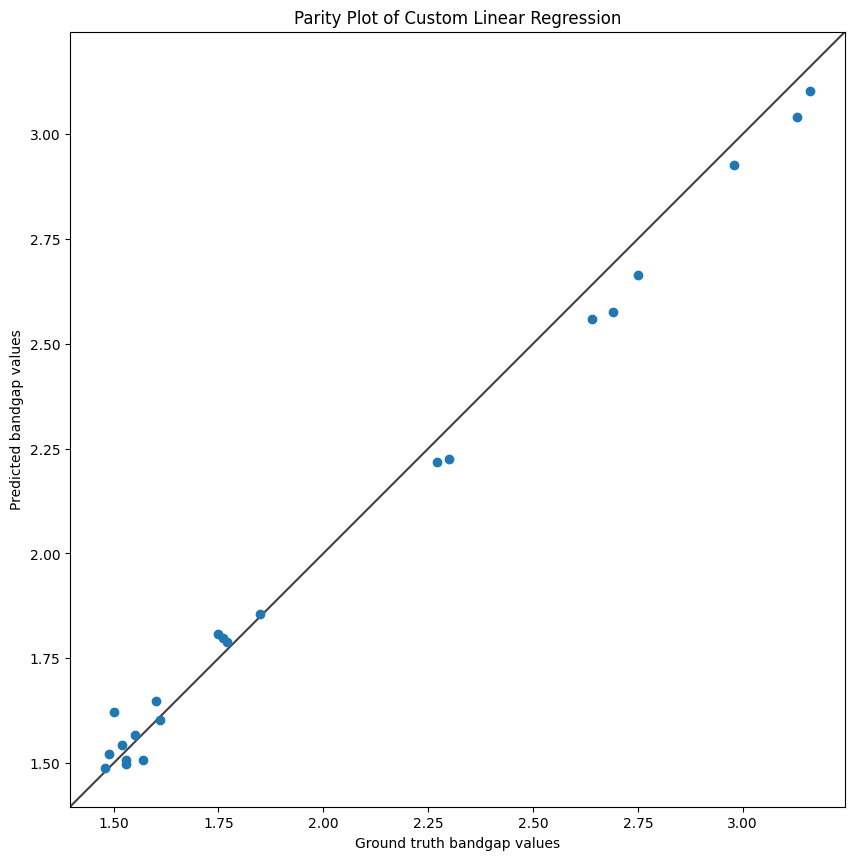

In [32]:
# Get the predictions of x_test into `y_pred`

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

In [33]:
alpha= [0.0001,0.001,0.01,0.1,0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
data=[]
for i in alpha:
    ridgeRegressor = Ridge(alpha = i) #here setting alpha 1
    ridgeRegressor.fit(x_train, y_train)
    y_predicted_ridge = ridgeRegressor.predict(x_test)
    
    R_squared = r2_score(y_predicted_ridge,y_test)
    data.append([i,R_squared])

#create header
header=["alpha",'RMSE']

# display table
print(tabulate(data, headers=header, tablefmt="grid"))

+---------+----------+
|   alpha |     RMSE |
+=========+==========+
|  0.0001 | 0.987954 |
+---------+----------+
|  0.001  | 0.987922 |
+---------+----------+
|  0.01   | 0.987604 |
+---------+----------+
|  0.1    | 0.984018 |
+---------+----------+
|  0.25   | 0.976481 |
+---------+----------+
|  0.5    | 0.959822 |
+---------+----------+
|  0.75   | 0.938391 |
+---------+----------+
|  1      | 0.912542 |
+---------+----------+
|  1.25   | 0.882573 |
+---------+----------+
|  1.5    | 0.848744 |
+---------+----------+
|  1.75   | 0.811274 |
+---------+----------+
|  2      | 0.770356 |
+---------+----------+


In [34]:
#Lasso regression
alpha= [0.0001,0.001,0.01,0.1,0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
data=[]
for i in alpha:
    # Train the model
    lassoRegressor = Lasso(alpha = i) #here setting alpha 1
    lassoRegressor.fit(x_train, y_train)
    y_predicted_lasso = lassoRegressor.predict(x_test)
    
    # calculating Mean Squared Error (mse)
    R_squared = r2_score(y_predicted_lasso,y_test)
    data.append([i,R_squared])

#create header
header=["alpha",'RMSE']

# display table
print(tabulate(data, headers=header, tablefmt="grid"))

+---------+--------------+
|   alpha |         RMSE |
+=========+==============+
|  0.0001 |  0.98764     |
+---------+--------------+
|  0.001  |  0.984616    |
+---------+--------------+
|  0.01   |  0.931436    |
+---------+--------------+
|  0.1    | -7.88034e+29 |
+---------+--------------+
|  0.25   | -7.88034e+29 |
+---------+--------------+
|  0.5    | -7.88034e+29 |
+---------+--------------+
|  0.75   | -7.88034e+29 |
+---------+--------------+
|  1      | -7.88034e+29 |
+---------+--------------+
|  1.25   | -7.88034e+29 |
+---------+--------------+
|  1.5    | -7.88034e+29 |
+---------+--------------+
|  1.75   | -7.88034e+29 |
+---------+--------------+
|  2      | -7.88034e+29 |
+---------+--------------+
